# JuliaR

### On DataFrames and R (dplyr)-like functionality in Julia

<img src="meme.jpg" alt="Drawing" style="width: 500px;"/>


---

## Package management 

### To download

```Pkg.add``` $\equiv$ ```install.packages```

In [1]:
import Pkg # load Pkg package into namespace
Pkg.add("DataFrames") # download package from github

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


### To load 

Either

In [2]:
import DataFrames 

Adds functions/variables/structs from ```DataFrames``` to namesapces with ```DataFrames.``` prefix.

i.e. 

In [5]:
DataFrames.nrow

nrow (generic function with 2 methods)

calls the ```nrow()``` function from ```DataFrames```;

sans prefix, ```nrow()``` throws an error.

In [6]:
nrow

LoadError: [91mUndefVarError: nrow not defined[39m

or

In [7]:
using DataFrames

Adds exported functions/variables/structs from ```DataFrames``` to namespace.

i.e. ```nrow()``` calls the ```nrow()``` function from ```DataFrames```.

In [8]:
nrow

nrow (generic function with 2 methods)

---

## Getting help

1) type ```?``` then the thing you want help with in the REPL

In [9]:
? + 

search: +



```
+(x, y...)
```

Addition operator. `x+y+z+...` calls this function with all arguments, i.e. `+(x, y, z, ...)`.

# Examples

```jldoctest
julia> 1 + 20 + 4
25

julia> +(1, 20, 4)
25
```

---

```
dt::Date + t::Time -> DateTime
```

The addition of a `Date` with a `Time` produces a `DateTime`. The hour, minute, second, and millisecond parts of the `Time` are used along with the year, month, and day of the `Date` to create the new `DateTime`. Non-zero microseconds or nanoseconds in the `Time` type will result in an `InexactError` being thrown.


2) Google it. 

3) Post in the slack

---

## Syntax 

- No ```assign``` or ```get``` operators, only ```=```

- In R the ```.``` has two uses

    1) we can use ```.``` within a variable name

    i.e. ```a.long.variable.name <- 1```

    2) can be used to define functions for a class

    i.e. if ```myclass``` is a class in R,

    ```
    > x <- c(2,3)
    > class(x) <- "myclass"
    > aFun.myclass <- function(x,...) 2*x + 1 
    > aFun(x)
    [1] 5 7
    attr(,"class")
    [1] "myclass"
    ```
    calls ```aFun.myclass(x)```.

    In Julia the ```.``` has two main uses 

    1) to access fields within an object/tuple (much like ```$``` in R)

    i.e. 

In [10]:
a = (b=1,c=2)
a.c

2

    2) to broadcast a function over an array (this may be my favourite feature)

    i.e. 

In [11]:
aFun = function(x) exp(x) end
A = [1 2; 3 4]
aFun.(A) ## elementwise exponential

2×2 Array{Float64,2}:
  2.71828   7.38906
 20.0855   54.5982

- vectors

    In R ```c(1,2,3,4)```

    In julia 

In [12]:
[1;2;3;4]

4-element Array{Int64,1}:
 1
 2
 3
 4

- Heaps of others

---

## Loading data 

In [13]:
import CSV 

Either 

```CSV.read("income.csv", DataFrame)```

or 

In [14]:
incomeCSV = CSV.File("income.csv") # an object of CSV type
income = DataFrame(incomeCSV)

,Year,AHE,Sex
,Int64,Float64,String
1,1992,12.9991,male
2,1992,11.618,male
3,1992,17.3773,male
4,1992,10.0613,female
5,1992,16.7567,male
6,1992,9.21617,female
7,1992,15.9587,female
8,1992,27.3692,male
9,1992,10.6392,male


which is equivalent to 

In [15]:
income = CSV.File("income.csv") |> DataFrame # piping!!

,Year,AHE,Sex
,Int64,Float64,String
1,1992,12.9991,male
2,1992,11.618,male
3,1992,17.3773,male
4,1992,10.0613,female
5,1992,16.7567,male
6,1992,9.21617,female
7,1992,15.9587,female
8,1992,27.3692,male
9,1992,10.6392,male


There is also a ```DelimitedFiles``` package 

---

## Basic operations 

The usage of some functionality is *exactly* the same as R;

In [16]:
nrow(income)

11130

In [17]:
ncol(income)

3

In [18]:
names(income)

3-element Array{String,1}:
 "Year"
 "AHE"
 "Sex"

---

## Indexing ```DataFrames```

There are many options (too many?).

Either 

In [19]:
income.Sex # most similar to income$Sex in R
income."Sex"

11130-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "male"
 "male"
 "male"
 "female"
 "male"
 "female"
 "female"
 "male"
 "male"
 "male"
 "female"
 "female"
 "male"
 ⋮
 "male"
 "male"
 "female"
 "male"
 "female"
 "female"
 "male"
 "female"
 "male"
 "male"
 "female"
 "female"

Or index with square brackets
```
income[rows, columns]
```

The rows argument can be 
```
: # get a COPY of all the rows
! # get a VIEW of all the rows 
```
Arrays indexing the rows are also allowed (i.e.```1:2:100``` or ```income[income.AHE.>10,:]```) but not recommended. 

The columns argument can be any of 
```
:Sex # the syntax for a Symbol type
"Sex" 
3
```
and can be passed as-is to return a ```Vector```

or as an ```Array``` to return a```DataFrame``` i.e.
```
[:Sex]
["Sex"]
[3]
```

In [20]:
## most similar to income$Sex in R
income.Sex 
income."Sex"
# returns a vector

## return a COPY of the column(s)
# as a vector
income[:,:Sex] 
income[:,"Sex"]
income[:,3]
# as a DataFrame
income[:,[:Sex]]
income[:,["Sex"]]
income[:,[3]]

## return a VIEW of the column(s)
# as a vector
income[!,:Sex] 
income[!,"Sex"]
income[!,3]
# as a DataFrame
income[!,[:Sex]] # this is my personal preference
income[!,["Sex"]]
income[!,[3]]


,Sex
,String
1,male
2,male
3,male
4,female
5,male
6,female
7,female
8,male
9,male


We can also pass arrays of indicies 

```income[!,[:Sex, :Year]]```

or invert selection with 

```income[!,Not(:Sex)]```


#### What is the difference between a *copy* and a *view*

In [21]:
aCopy = income[:,[:Sex]]
aCopy[1,:Sex] = "hello"
first(aCopy,5)

,Sex
,String
1,hello
2,male
3,male
4,female
5,male


In [22]:
first(income,5)

,Year,AHE,Sex
,Int64,Float64,String
1,1992,12.9991,male
2,1992,11.618,male
3,1992,17.3773,male
4,1992,10.0613,female
5,1992,16.7567,male


In [23]:
aView = income[!,[:Sex]]
aView[1,:Sex] = "hello"
first(aView,5)

,Sex
,String
1,hello
2,male
3,male
4,female
5,male


In [25]:
first(income,5)

,Year,AHE,Sex
,Int64,Float64,String
1,1992,12.9991,hello
2,1992,11.618,male
3,1992,17.3773,male
4,1992,10.0613,female
5,1992,16.7567,male


***```income``` has how changed!!!!***

Be careful.

---

## Piping 

Pass the object on the left to the function of the right. 

i.e. In R we use the `%>%` infix operator 
```
> aFun <- function(x) x^2
> b <- 2 
> b %>% aFun
[1] 4
```

In julia its `|>`

In [26]:
fun(x) = x^2
b = 2 
b |> fun  

4

Can broadcast via piping too

In [27]:
A = [1 2; 3 4]
A .|> fun 

2×2 Array{Int64,2}:
 1   4
 9  16

In [28]:
A |> fun 

2×2 Array{Int64,2}:
  7  10
 15  22

If this is your jam, then see the `Piping` package for some cool stuff.

## A likeness with ```dplyr```

The ```DataFrames``` package has the same data manipulation functionality as ```dplyr```



``` R ``` functions and their ```julia``` equivalents;

 - In R ```rename()```$\equiv$ in julia ```rename()``` - rename columns.
 
 - In R ```filter()```$\equiv$ in julia ```filter()``` - picks cases based on their values.
 
 - In R ```select()```$\equiv$ in julia ```select()``` - picks variables based on their names.
 
 - In R ```mutate()```$\equiv$ in julia ```transform()``` - adds new variables that are functions of existing variables.

 - In R ```summarise()```$\equiv$ in julia ```combine()``` - reduces multiple values down to a single summary

 - In R ```arrange()```$\equiv$ in julia ```sort()``` - changes the ordering of the rows.
 
 - In R ```group_by()```$\equiv$in julia ```groupby()``` - returns a ```GroupedDataFrame``` object.
 

```rename!(), filter!(), select!(), transform!(), sort!()``` also exist to manipulate DataFrames in-place
 
Here, common syntax is either 
```
:ColumName => :NewName
:ColumName => function => :NewName
:ColumName => function
```

Ex's.



In [29]:
incomeCopy = copy(income);
head(x) = first(x,5)
rename!(incomeCopy, :AHE => :Income) |> head # ! to operator on incomeCopy in place

,Year,Income,Sex
,Int64,Float64,String
1,1992,12.9991,hello
2,1992,11.618,male
3,1992,17.3773,male
4,1992,10.0613,female
5,1992,16.7567,male


In [30]:
filter!(:Income => (x-> x>20), incomeCopy) |> head # for some reason this one is backwards to the others!
# also has an optional argument view::Bool to specify whether to return a view or a copy

,Year,Income,Sex
,Int64,Float64,String
1,1992,27.3692,male
2,1992,20.2197,male
3,1992,26.0806,male
4,1992,20.9769,male
5,1992,26.8107,male


In [31]:
select!(incomeCopy, Not(:Year)) |> head 

,Income,Sex
,Float64,String
1,27.3692,male
2,20.2197,male
3,26.0806,male
4,20.9769,male
5,26.8107,male


In [32]:
incomeAdjust(income,sex) = (isequal.(sex,"male")*0.87 + isequal.(sex,"female")) .* income
transform!(incomeCopy,[:Income,:Sex] => incomeAdjust => :AdjustedIncome) |> head 

,Income,Sex,AdjustedIncome
,Float64,String,Float64
1,27.3692,male,23.8112
2,20.2197,male,17.5912
3,26.0806,male,22.6902
4,20.9769,male,18.2499
5,26.8107,male,23.3253


In [33]:
incomeBySex = groupby(income, :Sex) 

,Year,AHE,Sex
,Int64,Float64,String
1,1992,11.618,male
2,1992,17.3773,male
3,1992,16.7567,male
4,1992,27.3692,male
5,1992,10.6392,male
6,1992,6.98195,male
7,1992,14.4938,male
8,1992,20.2197,male
9,1992,9.79621,male


In [34]:
keys(incomeBySex)

3-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (Sex = "male",)
 GroupKey: (Sex = "female",)
 GroupKey: (Sex = "hello",)

In [35]:
incomeBySex[(Sex="male",)] |> head 

,Year,AHE,Sex
,Int64,Float64,String
1,1992,11.618,male
2,1992,17.3773,male
3,1992,16.7567,male
4,1992,27.3692,male
5,1992,10.6392,male


In [36]:
incomeBySex[1] |> head 

,Year,AHE,Sex
,Int64,Float64,String
1,1992,11.618,male
2,1992,17.3773,male
3,1992,16.7567,male
4,1992,27.3692,male
5,1992,10.6392,male


In [37]:
incomeBySexYear = groupby(income, [:Sex, :Year])
keys(incomeBySexYear)

9-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (Sex = "hello", Year = 1992)
 GroupKey: (Sex = "male", Year = 1992)
 GroupKey: (Sex = "female", Year = 1992)
 GroupKey: (Sex = "female", Year = 1994)
 GroupKey: (Sex = "male", Year = 1994)
 GroupKey: (Sex = "female", Year = 1996)
 GroupKey: (Sex = "male", Year = 1996)
 GroupKey: (Sex = "male", Year = 1998)
 GroupKey: (Sex = "female", Year = 1998)

In [38]:
incomeBySexYear[(Sex="male",Year=1992)] |> head 

,Year,AHE,Sex
,Int64,Float64,String
1,1992,11.618,male
2,1992,17.3773,male
3,1992,16.7567,male
4,1992,27.3692,male
5,1992,10.6392,male


In [39]:
describe(income)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Year,1994.87,1992,1994.0,1998,0,Int64
2,AHE,16.2627,2.13649,14.9838,52.4434,0,Float64
3,Sex,,female,,male,0,String


In [40]:
sort!(income, :AHE, rev = true) |> head 

,Year,AHE,Sex
,Int64,Float64,String
1,1996,52.4434,male
2,1996,52.4434,male
3,1992,50.27,female
4,1994,50.2342,male
5,1996,49.9461,male


---

## Functions 

Anonymous functions 

In [41]:
x -> 2*x + 1 

#5 (generic function with 1 method)

In-line function 

In [42]:
f1(x) = 2*x + 1

f1 (generic function with 1 method)

Other function definition 

In [43]:
f2 = function(x)
    2*x + 1 
end 

#7 (generic function with 1 method)

In [44]:
function f3(x)
    2*x + 1
end

f3 (generic function with 1 method)

Can also use a return keyword (like R)

In [45]:
function f4(x) 
    return 2*x + 1
end 

f4 (generic function with 1 method)

Optional/named arguments 

In [46]:
function f5(;x=1)
    return 2*x + 1
end

f5 (generic function with 1 method)

In [47]:
f5()

3

In [48]:
f5(1)

LoadError: [91mMethodError: no method matching f5(::Int64)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  f5(; x) at In[46]:1[39m

In [49]:
f5(x=1)

3

Typing and multiple dispatch are far too expansive topics to cover here. 

You can do most things without them to begin with. 

---

## Linear Models 

In [50]:
using GLM

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1278


In [51]:
lm1 = lm(@formula(log(AHE) ~ Year), income)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

:(log(AHE)) ~ 1 + Year

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  2.19738      3.79287     0.58    0.5624  -5.23732     9.63208
Year         0.000248876  0.00190131  0.13    0.8959  -0.00347803  0.00397578
─────────────────────────────────────────────────────────────────────────────

In [52]:
exp.(predict(lm1, DataFrame(Year=2021, Sex="female")))

1-element Array{Float64,1}:
 14.885074146357391

In [53]:
using Plots 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


see also `StatsPlots`

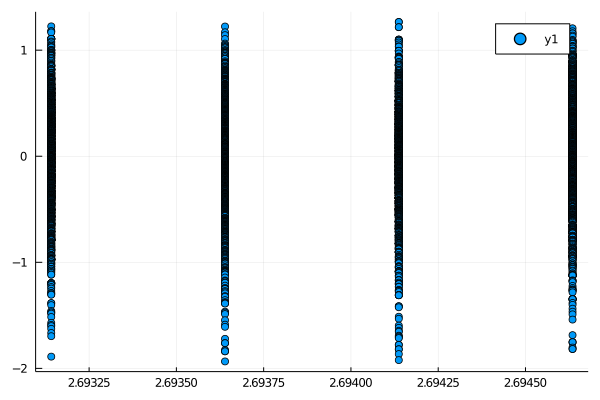

In [54]:
scatter(fitted(lm1.model), residuals(lm1.model))

In [55]:
lm2 = lm(@formula(log(AHE) ~ Sex + Year), income, contrasts = Dict(:Year => DummyCoding()))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

:(log(AHE)) ~ 1 + Sex + Year

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   2.64379     0.00930183  284.22    <1e-99   2.62556     2.66202
Sex: hello   -0.0789068   0.442598     -0.18    0.8585  -0.946476    0.788663
Sex: male     0.12926     0.00841026   15.37    <1e-52   0.112774    0.145745
Year: 1994   -0.0352327   0.0115052    -3.06    0.0022  -0.0577849  -0.0126805
Year: 1996   -0.0514071   0.0118822    -4.33    <1e-4   -0.0746983  -0.0281159
Year: 1998    0.00993609  0.0118891     0.84    0.4033  -0.0133687   0.0332409
────────────────────────────────────────────────────────────────────────

---

## A task